In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid")
# sns.set_context("paper", font_scale=2) 

In [82]:
# %matplotlib inline
# plt.style.use('seaborn-ticks')
# plt.rcParams.update({'font.size': 14})

In [83]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

Стандартизация для второго признака

In [84]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [85]:
X[2, :], X_st[2, :]

(array([ 500.,  700.,  750.,  600., 1450.,  800., 1500., 2000.,  450.,
        1000.]),
 array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]))

Рассчет логорифмической ошибки 

In [86]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

Функция сигмоиды

In [174]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

Геренируем предсказанные значения

In [89]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [92]:
def loos_func (x):
    return 0 if x> 0 else 1

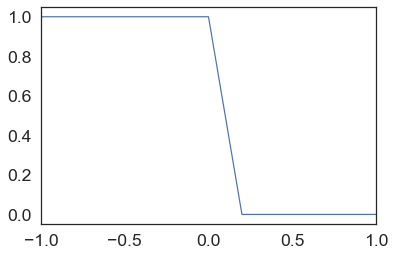

In [97]:
funk_q = [loos_func (x) for x in z]
plt.xlim(-1,1)
plt.plot(z, funk_q)

Логистическая регрессия 

In [140]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        b = y_pred
        err = calc_logloss(y, y_pred)
        w -= alpha/n * np.dot((y_pred - y), X.T)
        if i % (iterations / 5) == 0:
            print(i, w, err)         
    return w

In [141]:
w = eval_LR_model(X_st, y, iterations=200000, alpha=1e-1)

40000 [-23.39586354  -2.49284529  -6.02894601  19.31175109] 0.16381854095765003
80000 [-32.55945604  -3.30165889  -8.68797188  26.72263738] 0.1264612894416835
120000 [-38.83724799  -3.85031742 -10.4914267   31.76762715] 0.10923071650432788
160000 [-43.74310924  -4.26959624 -11.90077736  35.68232713] 0.09880498221100761
200000 [-47.85665228  -4.61133893 -13.08726994  38.94069521] 0.09152495201442823


2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Выбранные параметры iterations=200000 и alpha=1e-1 - оставляю такими для минимального значения ошибки, 
потому как при дальнейшем росте количества итенраций мой ноутбук начинает крайне медленно работать.

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1
(на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).

In [ ]:
# Взяла порог 0.7, потому что с порогом 0.5 не инетересно - получается поровну по 5

In [330]:
def calc_pred_proba1 (X, w):
    global y_pred
    y_pred = sigmoid(np.dot(w.T, X))
    return y_pred

In [331]:
calc_pred_proba1(X_st, w)

[0.33023082 0.00222649 1.         0.03210471 0.9667719  0.01488005
 1.         0.00806199 0.65528419 1.        ]


array([0.33023082, 0.00222649, 1.        , 0.03210471, 0.9667719 ,
       0.01488005, 1.        , 0.00806199, 0.65528419, 1.        ])

In [343]:
for m in y_pred:
    if m > 0.7:
        m == 1      
    else:
        m == 0
print (y_pred)

[0.33023082 0.00222649 1.         0.03210471 0.9667719  0.01488005
 1.         0.00806199 0.65528419 1.        ]


Дальше я запуталась и сделать не смогла